# LoadParticles

This demo is an example for how to use the `--beamFile` argument from Python.
We will load the file `test.csv`.

In [1]:
import pandas as pd


In [2]:
test_data = pd.read_csv('test.csv', names=('particle_type','x [mm]', 'xp', 'y [mm]', 'yp', 'z[mm]', 'Ek [MeV]'))
print(len(test_data))
test_data

7


,particle_type,x [mm],xp,y [mm],yp,z[mm],Ek [MeV]
0,e-,1,0,1,0,-10,220
1,e+,1,0,1,0,-10,220
2,gamma,-1,0,1,0,-10,220
3,gamma,-1,0,1,0,-10,220
4,proton,1,0,-1,0,-10,220
5,neutron,1,0,-1,0,-10,220
6,ion::6;12,1,0,-1,0,-10,220


In [3]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
import ROOT
import os

Welcome to JupyROOT 6.24/06


In [4]:
#Setup MiniScatter -- modify the path to where you built MiniScatter!
import sys
MiniScatter_path="../build/."
sys.path.append(MiniScatter_path)

import miniScatterDriver
import miniScatterScanner
import miniScatterPlots

In [5]:
### Basic simulation parameters ###

QUIET   = False #Reduced output?
TRYLOAD = True  #Try to load already existing data instead of recomputing?
#Where to store temporary data for scans (a fast file system, NOT EOS/AFS)
TMPFOLDER = "/tmp/miniScatter/LoadParticles"

baseSimSetup = {}
#baseSimSetup["PHYS"] = "QGSP_BERT__SS" #Use the __SS physics lists for thin foils
baseSimSetup["PHYS"]  = "QGSP_BERT"

baseSimSetup["N"]     = len(test_data) #Just a few events here! Remember that thicker targets are slower
baseSimSetup["BEAMFILE"] = os.path.join(os.getcwd(),"test.csv")

baseSimSetup["ENERGY"] = 200.0 #[MeV]

#Use a flat distribution or cut the tails of the Gaussian?
#baseSimSetup["BEAM_RCUT"] = 3.0

#Where to start the beam.
#baseSimSetup["ZOFFSET_BACKTRACK"] = True
baseSimSetup["ZOFFSET"]           = 0.0 #Auto

#Beam particle type
baseSimSetup["BEAM"]    = "e-"

baseSimSetup["WORLDSIZE"] = 100.0 #Make the world wider

#Target is 10 mm of aluminium
baseSimSetup["THICK"] = 10
baseSimSetup["MAT"] = "G4_Al"

#Detector distance from target center [mm] 
baseSimSetup["DIST"] = 300.0 

#Some output settings
baseSimSetup["QUICKMODE"] = False #Include slow plots
baseSimSetup["MINIROOT"]  = False #Skip TTRees in the .root files

baseSimSetup["EDEP_DZ"]   = 1.0
baseSimSetup["CUTOFF_RADIUS"] = 100.0 #Larger radial cutoff

#Store the .root files in a subfolder from where this script is running,
# normally MiniScatter/examples, in order to keep things together
baseSimSetup["OUTFOLDER"] = os.path.join(os.getcwd(),"LoadParticles")


In [6]:
simSetup_loaded = baseSimSetup.copy()
#Give the .root file a name
simSetup_loaded["OUTNAME"] = "loaded"

# Run & load in one step, with results caching
(twiss_loaded, twiss_loaded, objects_loaded) = \
    miniScatterDriver.getData_tryLoad(simSetup_loaded, tryload=TRYLOAD,\
    getObjects=["targetEdep","target_edep_dens","target_edep_rdens","metadata"])

Did not find any pre-computed data at '/mn/kvant/u5/kyrrens/code/MiniScatter/examples/LoadParticles/loaded.root', computing now.
Running command line: './MiniScatter --thick 10 --mat G4_Al --dist 300.0 --worldsize 100.0 --phys QGSP_BERT --numEvents 7 --energy 200.0 --beam e- --zoffset 0.0 --beamFile /mn/kvant/u5/kyrrens/code/MiniScatter/examples/test.csv --outname loaded --outfolder /mn/kvant/u5/kyrrens/code/MiniScatter/examples/LoadParticles --cutoffRadius 100.0 --edepDZ 1.0'
RunFolder = '/mn/kvant/u5/kyrrens/code/MiniScatter/build'
logName   = '/mn/kvant/u5/kyrrens/code/MiniScatter/examples/LoadParticles/loaded.txt'
|
Event# 0
\
Done!


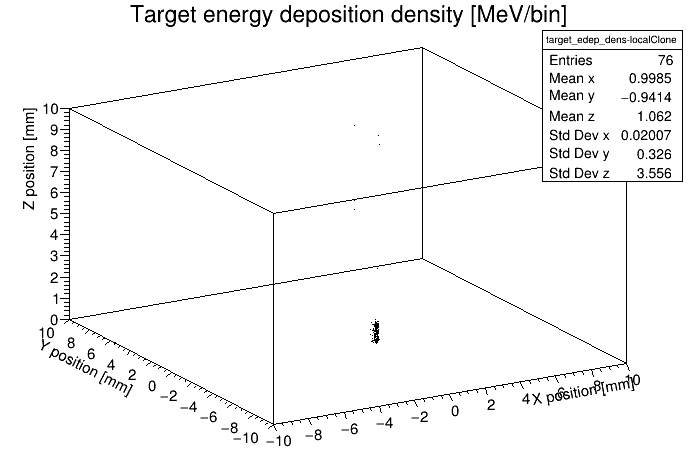

In [7]:
canvas = ROOT.TCanvas()
objects_loaded["target_edep_dens"].Draw()
canvas.Draw()